In [3]:
!pip install replicate
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [15]:
from google.colab import userdata
import os

# ambil api_token dari secret
api_token = userdata.get("api_token")

# lempar api_token ke env. var.
os.environ["REPLICATE_API_TOKEN"] = api_token

In [5]:
from langchain_community.llms import Replicate

# Get the llm
llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

In [6]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 12.8 MB/s eta 0:00:00


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!ls "/content/drive/MyDrive/Capstone Project"

 bike_data_cleaned.csv	'bike data.csv'


In [9]:
import pandas as pd

file_path = "/content/drive/MyDrive/Capstone Project/bike data.csv"
df = pd.read_csv(file_path)
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238


In [10]:
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238


In [24]:
#Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop_duplicates()
numeric_cols = ['Order Quantity','Unit Cost','Unit Price','Revenue','Profit']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

/tmp/ipython-input-243826480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [40]:
# Hapus spasi & convert ke float
df['Profit'] = df['Profit'].astype(str).str.replace(',', '').str.strip()  # hapus comma/spasi
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [41]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # coerce invalid
df['Month'] = df['Date'].dt.to_period('M').astype(str)     # ubah ke string supaya seaborn bisa plot

In [42]:
monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()

In [25]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent

# Buat agent
agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True  # opsional, kalau mau execute Python code otomatis
)

# Contoh run query
agent.run("Tampilkan summary pembeli berdasarkan usia dan gender")
agent.run("Buat rekomendasi marketing berdasarkan data ini")



> Entering new AgentExecutor chain...
Thought: To provide a summary of customers based on age and gender, I need to group the data by 'Age Group' and 'Customer Gender' and then use descriptive statistics to summarize the data.

Action: python_repl_ast

Action Input: 
```python
summary = df.groupby(['Age Group', 'Customer Gender']).size().unstack(fill_value=0)
summary
```
Customer Gender           F      M
Age Group                         
Adults (35-64)        27274  28084
Seniors (64+)           331    388
Young Adults (25-34)  18535  19764
Youth (<25)            8083   9577The summary of customers based on age and gender is as follows:

- For 'Adults (35-64)', there are 27,274 female customers and 28,084 male customers.
- For 'Seniors (64+)', there are 331 female customers and 388 male customers.
- For 'Young Adults (25-34)', there are 18,535 female customers and 19,764 male customers.
- For 'Youth (<25)', there are 8,083 female customers and 9,577 male customers.

Final Answer:



'Based on the analysis, marketing recommendations for this dataset include implementing loyalty programs, personalized marketing campaigns, upselling and cross-selling strategies, gathering customer feedback, and offering exclusive benefits or early access to events. These actions aim to retain and grow the business from the substantial segment of high-value, repeat customers identified in the data.'

In [26]:
# Mapping kategori ke angka
age_mapping = {
    'Youth (<25)': 20,
    'Young Adults (25-34)': 30,
    'Adults (35-64)': 50
}

df['Age_numeric'] = df['Age Group'].map(age_mapping)

# Sekarang bisa hitung rata-rata
age_mean = df['Age_numeric'].mean()
print(f"Rata-rata usia: {age_mean:.1f}")

Rata-rata usia: 38.4


/tmp/ipython-input-4244979064.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_numeric'] = df['Age Group'].map(age_mapping)


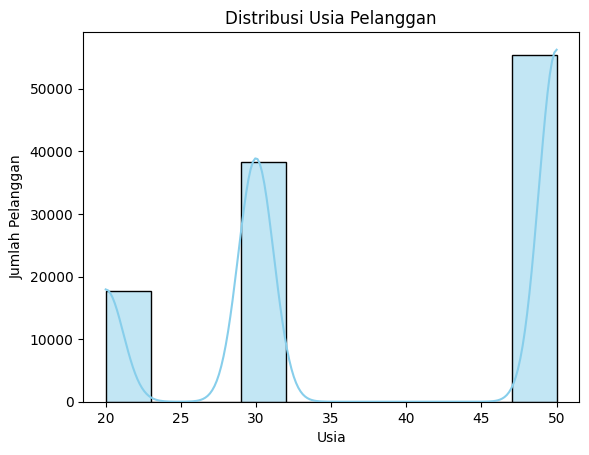

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age_numeric'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Usia Pelanggan")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")
plt.show()

/tmp/ipython-input-3518643775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Gender', data=df, palette='pastel')


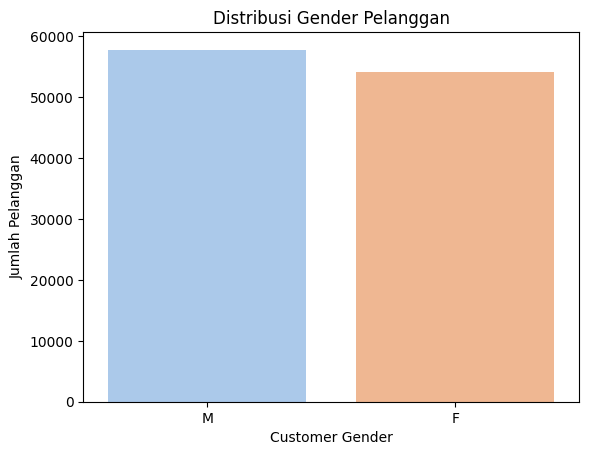

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Customer Gender', data=df, palette='pastel')
plt.title("Distribusi Gender Pelanggan")
plt.xlabel("Customer Gender")
plt.ylabel("Jumlah Pelanggan")
plt.show()

/tmp/ipython-input-2258189165.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product Category', data=df, palette='Set2')


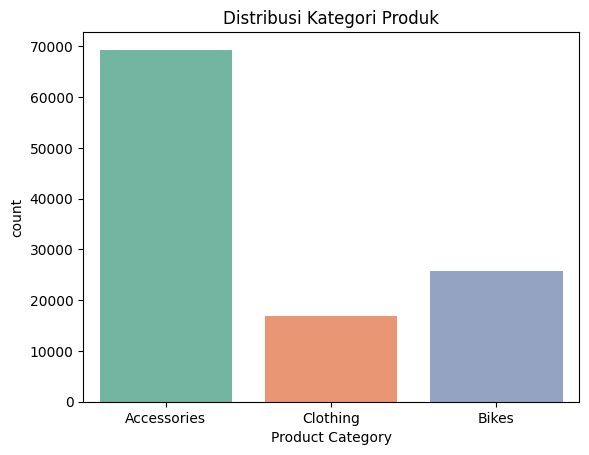

In [35]:
sns.countplot(x='Product Category', data=df, palette='Set2')
plt.title("Distribusi Kategori Produk")
plt.show()

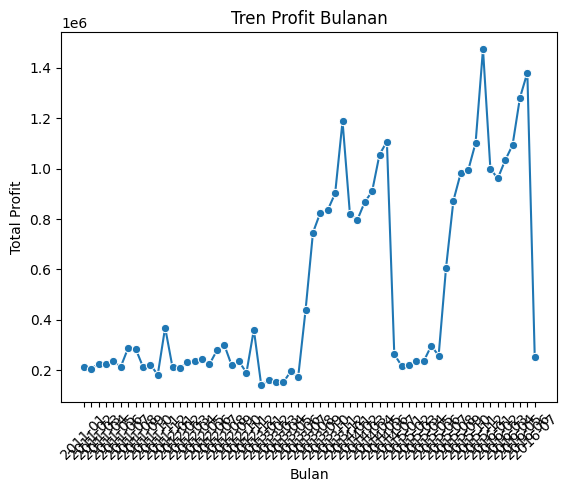

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='Month', y='Profit', data=monthly_profit, marker='o')
plt.title("Tren Profit Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3363420275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='Revenue', data=yearly_revenue, palette='Blues_d')


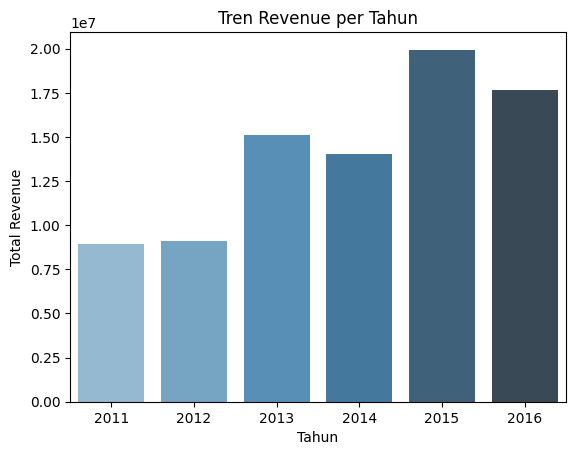

In [45]:
yearly_revenue = df.groupby('year')['Revenue'].sum().reset_index()

sns.barplot(x='year', y='Revenue', data=yearly_revenue, palette='Blues_d')
plt.title("Tren Revenue per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Revenue")
plt.show()

In [47]:
from langchain_community.llms import Replicate
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent

# Granite LLM via Replicate
llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

# Buat agent untuk dataframe
agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True
)

In [57]:
prompt_summary = """
Buat ringkasan insight dari dataset penjualan sepeda berdasarkan Age Group, Gender, Product Category, Month, Year, Revenue, dan Profit.
"""

summary_text = llm(prompt_summary)
print(summary_text)

prompt_recommendation = """
Buat rekomendasi marketing berdasarkan dataset ini. Sertakan segmentasi usia, produk, dan tren waktu.
"""

recommendation_text = llm(prompt_recommendation)
print(recommendation_text)

Berikut adalah ringkasan insight yang dapat diambil dari dataset penjualan sepeda berdasarkan kriteria yang diberikan:

1. **Tren Age Group**: Analisis untuk melihat apakah ada tren generasi khusus yang meningkat atau menurun dalam jualan sepeda. Misalnya, apakah generasi millennial atau Gen Z menunjukkan lebih tingginya penjualan sepeda elektronik, sedangkan generasi tua lebih minat dengan sepeda klasik.

2. **Gender Difference**: Perbandingan antara penjualan sepeda kepada pria dan wanita. Ini dapat menunjukkan apakah ada kategori sepeda yang lebih populer di antara pria atau wanita, dan apakah gender tersebut memiliki preferensi yang berbeda terhadap model, fitur, atau harga.

3. **Product Category Performance**: Penilaian kinerja untuk setiap kategori produk sepeda (misalnya, sepeda perempuan, sepeda pria, sepeda anak, sepeda mountain, sepeda urban, dll.). Ini membantu mengidentifikasi kategori yang menjadi peluang bisnis utama atau yang memerlukan perhatian atau perbaikan.

4. **S